# OHLCV Anomaly Detection Tutorial

This notebook demonstrates how to detect anomalies in stock price data using chronos-lab.

## Setup

Install and import required libraries and define the list of tech stock symbols to analyze.

In [ ]:
!pip install chronos-lab[yfinance,analysis,visualization]

In [1]:
from chronos_lab.sources import ohlcv_from_yfinance
from chronos_lab.analysis.driver import AnalysisDriver
from chronos_lab.plot import plot_ohlcv_anomalies

symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "ORCL", "AVGO", "INTC"
]

## Fetch Historical Data

Download one year of daily OHLCV data from Yahoo Finance for the selected symbols.

In [2]:
ohlcv = ohlcv_from_yfinance(symbols=symbols, period='1y')

[*********************100%***********************]  10 of 10 completed


## Detect Anomalies

Run anomaly detection using Isolation Forest algorithm. This filters symbols with anomalies present within last 3 months and saves results to a dataset.

In [3]:
driver = AnalysisDriver()

In [6]:
anomalies = driver.detect_anomalies(ohlcv, to_dataset="enabled")

## Generate Plots

Create Bloomberg-style candlestick charts with highlighted anomalies for each symbol, where anomalies are detected within last 3 months.

2026-02-02 10:28:46,185 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol AAPL. Skipping plot generation.
2026-02-02 10:28:46,186 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol AMZN. Skipping plot generation.


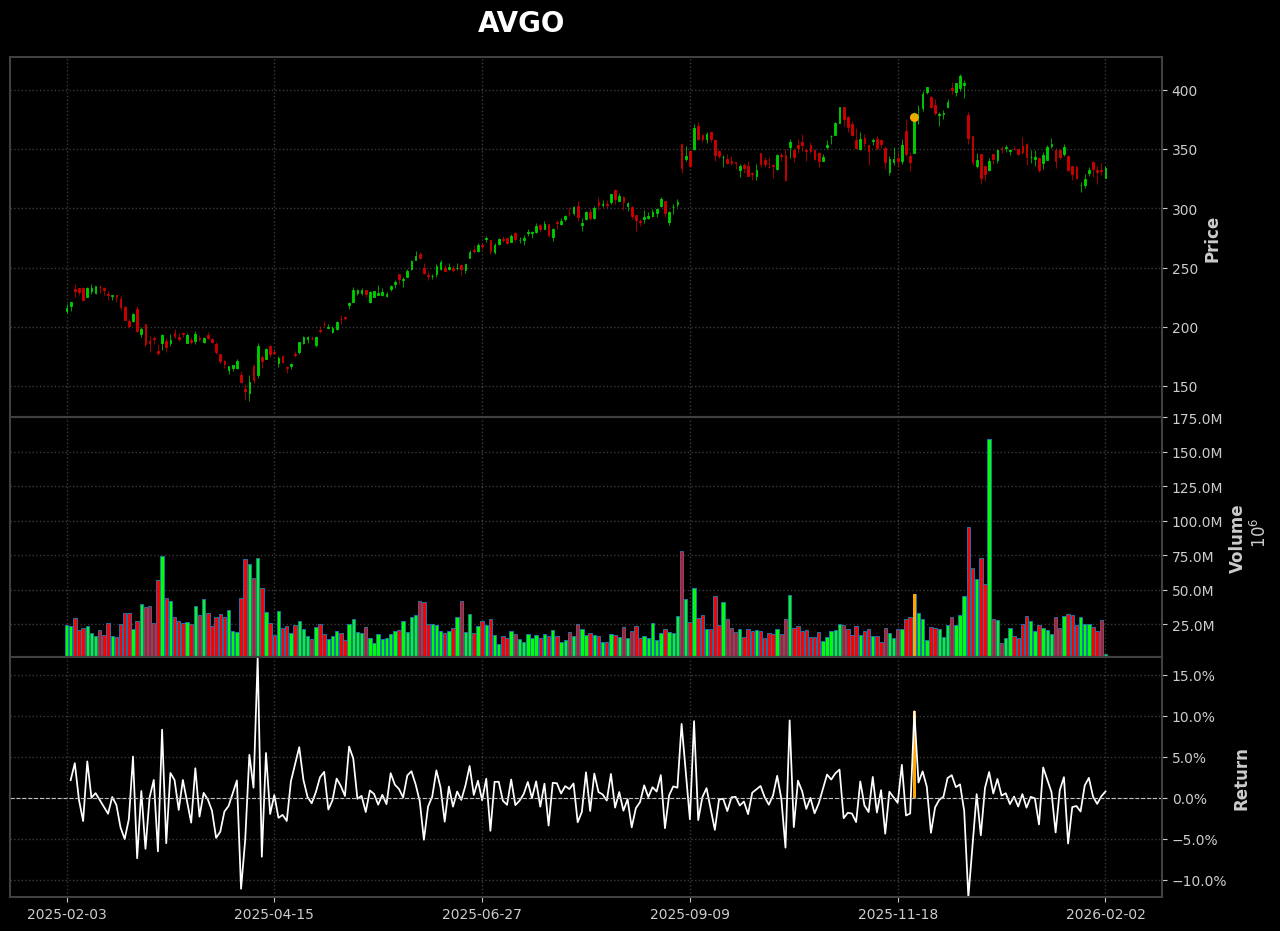

2026-02-02 10:28:46,608 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol GOOGL. Skipping plot generation.
2026-02-02 10:28:46,609 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol INTC. Skipping plot generation.


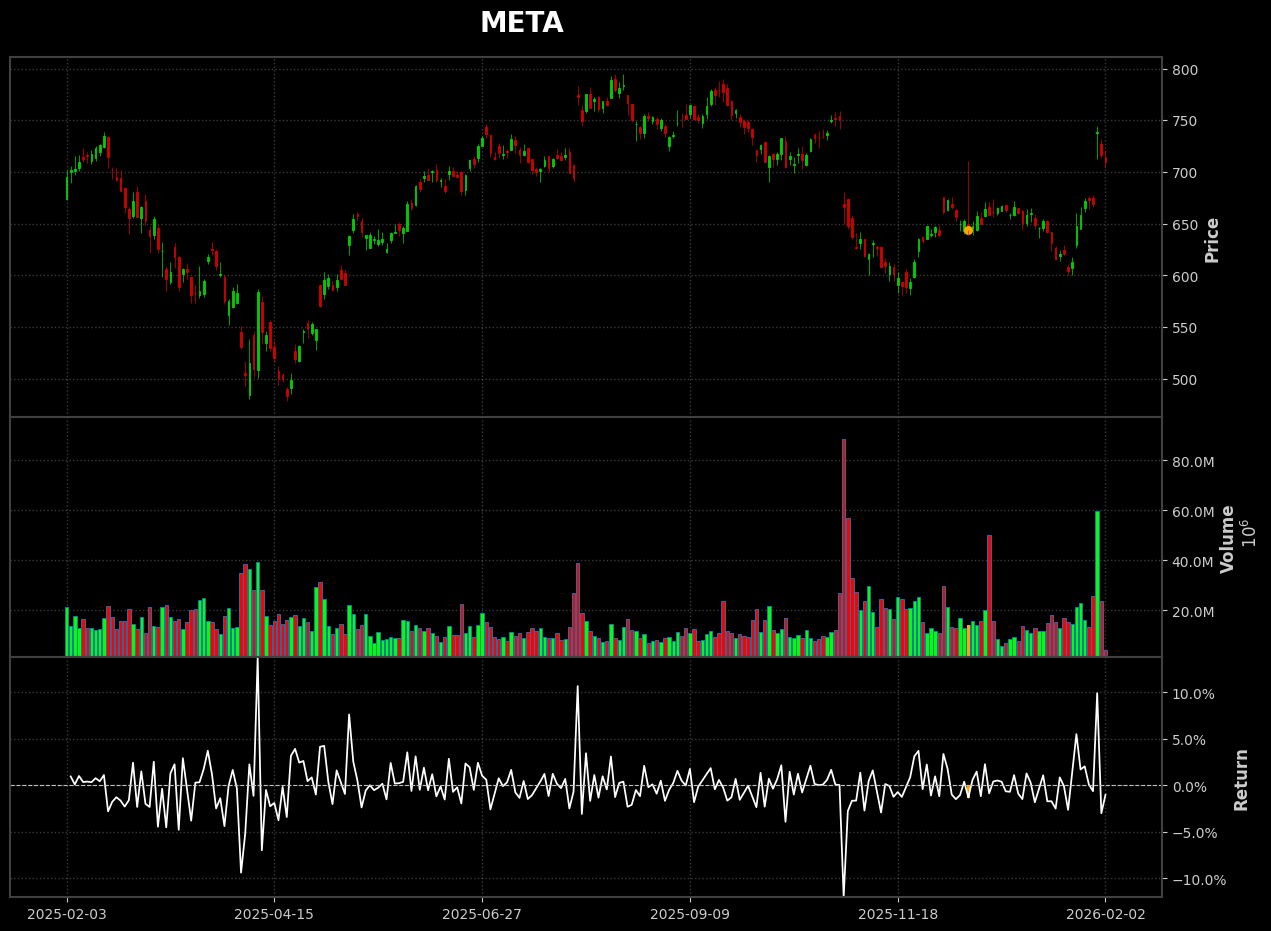

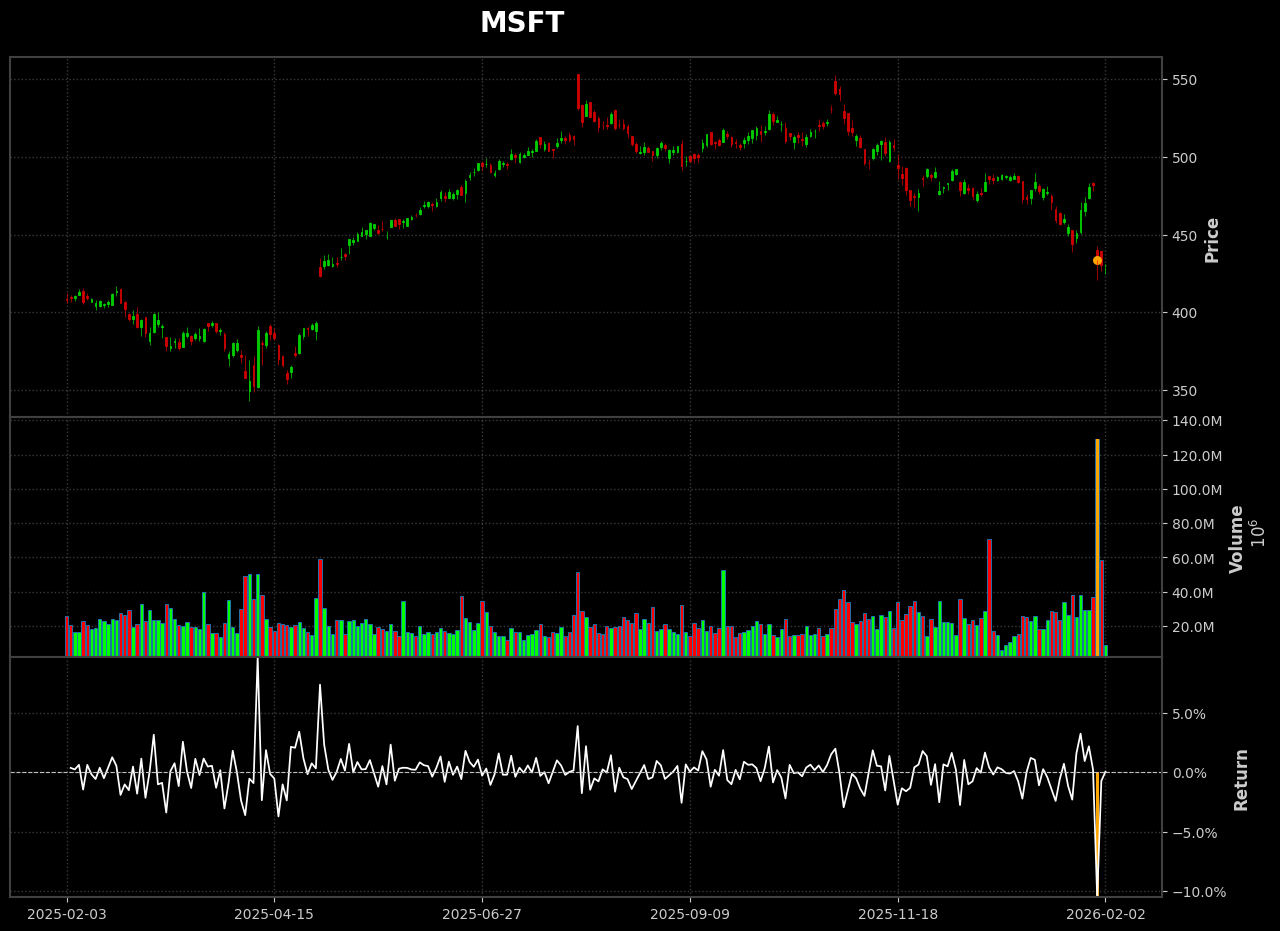

2026-02-02 10:28:47,556 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol NVDA. Skipping plot generation.


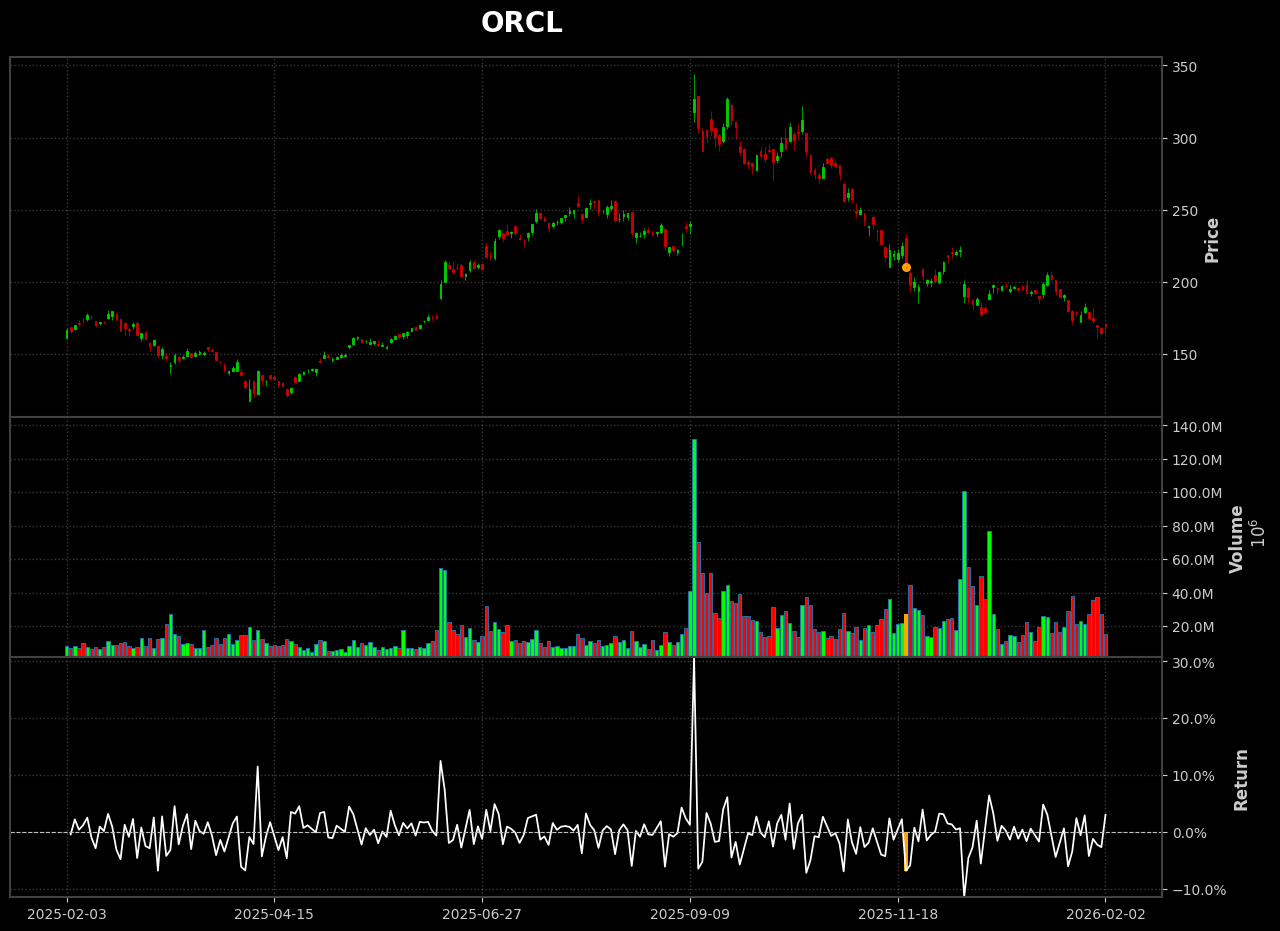

2026-02-02 10:28:47,943 | root | plot_ohlcv_anomalies | WARNING:No anomalies found for symbol TSLA. Skipping plot generation.


In [14]:
if 'analysis_result' in anomalies:
    symbols_to_plot = anomalies['analysis_result'].index.get_level_values('symbol').unique().sort_values().tolist()

    for symbol in symbols_to_plot:
        ohlcv_anomalies_df = anomalies['analysis_result'].xs(symbol, level='symbol', drop_level=False)
        plot_data = plot_ohlcv_anomalies(ohlcv_anomalies_df, anomaly_period_filter='3m')
else:
    print("No anomalies found.")

## Inspect Calculation Pipeline

Dive into the complete execution graph powering the analysis. This visualization reveals every runtime input, transformation, and dependency that drives the anomaly detection pipeline from raw data to final results.


In [9]:
from IPython.display import HTML

g = driver.drivers['detect_anomalies'].display_all_functions()

HTML(f"""
<div style="width:100%; overflow-x:auto; border:1px solid #ccc;">
    {g._repr_image_svg_xml()}
</div>
""")